# NLP Setimental Analysis

# 1. Imports Libraries

In [1]:
!pip install wordcloud
!pip install sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import sklearn
import string 
import re

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix


# 1.1 Import the dataset

In [2]:
data=pd.read_csv(r'C:\Users\John Paul Uzowuru\Desktop\University Courses\CS7052 Machine Learning\Course work\archive\train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# 1.2 Preprocessing Stage

In [3]:
#remove Duplicate tweets
data.drop_duplicates(subset='tweet',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29530 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      29530 non-null  int64 
 1   label   29530 non-null  int64 
 2   tweet   29530 non-null  object
dtypes: int64(2), object(1)
memory usage: 922.8+ KB


In [4]:
# Helps to find a pattern in the text
def search_pattern (inputtext, pattern):
    sentence=re.findall(pattern, inputtext)
    print(sentence)
    for every_word in sentence: 
        inputtext=re.sub(every_word,'',inputtext)
    return inputtext

In [5]:
#remove twitter handles
data['Clean_text']=np.vectorize(search_pattern)(data['tweet'], "@[\w]*")

#Visualization to view if the twitter handles are removed from the tweet text
data.head()

['@user']
['@user']
['@user', '@user']
[]
[]
[]
[]
['@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user']
[]
[]
['@user', '@user']
[]
[]
[]
['@user']
[]
[]
[]
[]
['@user']
[]
[]
[]
[]
['@user', '@user']
['@user', '@user', '@user', '@user', '@user', '@user']
[]
['@user']
[]
['@user']
[]
[]
['@user', '@user', '@user', '@user']
['@user']
[]
[]
[]
[]
['@user']
[]
[]
[]
[]
[]
['@user']
[]
[]
[]
[]
[]
[]
['@user']
['@user']
['@user']
['@']
[]
['@user']
[]
['@user']
[]
[]
['@user']
[]
[]
['@user']
['@user']
[]
[]
[]
[]
['@user']
[]
[]
['@user']
[]
[]
['@user', '@user', '@user', '@user', '@user']
['@user', '@user']
['@user', '@user']
[]
['@user', '@user']
['@user', '@user', '@user']
[]
[]
[]
[]
[]
[]
[]
['@user', '@user']
['@user', '@user']
[]
['@user']
[]
['@user']
['@user']
[]
['@']
[]
[]
[]
['@user', '@user', '@user', '@user']
[]
[]
[]
[]
['@user']
['@user']
['@user']
[]
['@user']
[]
['@user']
['@user', '@user', '@user', '@user', '@user', '@user']
[]
[]
[]
[]
[]
[]
['@user

[]
[]
[]
[]
[]
[]
['@user', '@user']
['@']
['@user', '@user']
[]
['@user', '@user']
[]
[]
['@user', '@user']
['@user']
[]
['@user']
[]
['@user', '@user']
[]
[]
[]
[]
['@user', '@user']
[]
['@user', '@user']
[]
['@user']
[]
['@user']
[]
[]
[]
['@user', '@user', '@user']
['@user']
['@user']
[]
[]
[]
[]
['@user', '@user']
[]
['@user']
[]
[]
['@user']
['@user']
[]
['@user', '@user']
['@user']
['@']
['@user']
[]
[]
[]
['@user', '@user']
['@user']
['@user']
[]
[]
[]
[]
['@user']
[]
[]
[]
[]
['@user']
[]
['@user']
['@user']
['@user']
[]
[]
['@user', '@user', '@user', '@user', '@user']
[]
[]
[]
['@user', '@user', '@user', '@user', '@user']
[]
[]
[]
['@user']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['@user']
[]
[]
['@user']
[]
['@user']
[]
[]
['@user']
[]
[]
[]
[]
['@user']
[]
[]
[]
[]
['@user', '@user']
['@user']
['@user', '@user', '@user', '@user']
['@user']
[]
[]
[]
[]
[]
['@user']
['@user']
[]
['@user']
[]
[]
['@user']
[]
['@user', '@user', '@user', '@user']
[]
['@user', '@user']
['@user', '@user', '@us

['@user']
[]
[]
[]
['@user']
[]
['@user']
[]
[]
[]
['@user', '@user', '@user', '@user', '@user', '@user', '@user']
['@user', '@user']
[]
['@user', '@user']
['@user', '@user', '@user']
['@user']
[]
[]
['@user', '@user']
[]
['@user', '@user', '@user']
['@user', '@user', '@user', '@user']
[]
[]
['@user', '@user']
[]
['@user']
[]
[]
['@user']
[]
[]
[]
['@user']
[]
[]
['@user', '@user', '@user']
[]
[]
['@user']
['@user']
[]
[]
[]
['@user']
['@user']
[]
['@user']
['@user']
[]
['@user', '@user', '@user', '@user', '@user']
[]
[]
['@user', '@user', '@user']
['@user']
['@user']
['@user']
[]
[]
[]
[]
[]
['@user', '@user']
[]
[]
['@user']
[]
[]
['@user']
[]
[]
['@user']
['@user']
[]
['@user', '@user']
['@user']
[]
[]
['@user']
['@user']
[]
[]
['@user']
['@user', '@user', '@user']
['@user', '@user']
[]
[]
[]
['@user']
['@user']
[]
[]
[]
['@user', '@user']
[]
['@user']
[]
[]
['@user']
[]
[]
['@user']
[]
[]
['@user', '@user']
['@user']
['@user']
['@user']
['@user']
[]
['@user']
[]
[]
[]
[]
[]
[]
['@u

[]
['@user']
['@user']
[]
[]
['@user']
[]
[]
[]
[]
[]
[]
['@user', '@user']
[]
[]
[]
[]
[]
[]
['@user']
[]
['@user']
['@user', '@user']
[]
[]
['@user']
[]
['@user']
[]
[]
['@user']
[]
[]
[]
['@user']
[]
[]
[]
[]
['@']
[]
['@user']
[]
['@user']
['@user']
['@user']
[]
[]
['@user']
['@user', '@user']
[]
[]
[]
['@user', '@user', '@user']
[]
[]
[]
[]
['@user']
[]
['@user', '@user']
['@user', '@user', '@user']
[]
['@user']
[]
[]
[]
[]
[]
[]
['@user', '@user']
['@user', '@user', '@user']
['@user']
[]
[]
[]
['@user', '@user']
['@user']
[]
[]
[]
['@user']
[]
[]
['@user', '@user', '@user']
[]
['@user']
[]
[]
[]
[]
[]
['@user', '@user']
['@user', '@user']
['@user']
[]
[]
[]
[]
[]
['@user']
[]
[]
[]
[]
['@user']
[]
['@user', '@user']
[]
['@user']
['@user']
[]
['@user']
[]
[]
[]
[]
[]
[]
[]
[]
['@user', '@user']
['@user']
[]
[]
[]
['@user', '@user', '@user']
['@user', '@user', '@user']
['@user']
[]
[]
[]
['@user']
['@user', '@user']
[]
['@user', '@user']
[]
[]
['@user']
['@user']
[]
[]
[]
['@user']

,id,label,tweet,Clean_text
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [6]:
#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text
#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)


In [7]:
data['Clean_text'] = data['Clean_text'].str.replace("^[a-zA-Z]", "")
data.head()

C:\Users\John Paul Uzowuru\AppData\Local\Temp\ipykernel_16760\504887740.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Clean_text'] = data['Clean_text'].str.replace("^[a-zA-Z]", "")


,id,label,tweet,Clean_text
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
# Applied cleaning definition on every text in a loop
texts_new = []
for i in data.tweet:
    texts_new.append(remove_mult_spaces(filter_chars(strip_all_entities(i))))

#check the data if its cleaned or not
data.head()

,id,label,tweet,Clean_text
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [9]:
#removing 2 letter words below
data['Clean_text']=data['Clean_text'].apply(lambda sentence: " ". join([everyword for everyword in str(sentence).split() if len (everyword)>2 ]))

In [10]:
data['Clean_text']

0        when father dysfunctional and selfish drags hi...
1        thanks for #lyft credit can't use cause they d...
2                                      bihday your majesty
3        #model love take with all the time urð±!!! ð...
4                      factsguide: society now #motivation
                               ...                        
31956         fishing tomorrow carnt wait first time years
31957    isz that youuu?ðððððððð...
31958    see nina turner the airwaves trying wrap herse...
31959       istening sad songs monday morning otw work sad
31961                              hank you for you follow
Name: Clean_text, Length: 29530, dtype: object

In [11]:
data.head()

,id,label,tweet,Clean_text
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional and selfish drags hi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit can't use cause they d...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with all the time urð±!!! ð...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [12]:
#tokenize tweet
text_split=data["Clean_text"].apply(lambda sentence:sentence.split())
text_split.head()

0    [when, father, dysfunctional, and, selfish, dr...
1    [thanks, for, #lyft, credit, can't, use, cause...
2                              [bihday, your, majesty]
3    [#model, love, take, with, all, the, time, urð...
4             [factsguide:, society, now, #motivation]
Name: Clean_text, dtype: object

In [13]:
nltk.download("stopwords")

#stem the words
from nltk.stem.porter import PorterStemmer
stems = text_split.apply(lambda sentence: [PorterStemmer().stem(word) for word in sentence])


 

[nltk_data] Downloading package stopwords to C:\Users\John Paul
[nltk_data]     Uzowuru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
stems.head()

0    [when, father, dysfunct, and, selfish, drag, h...
1    [thank, for, #lyft, credit, can't, use, caus, ...
2                              [bihday, your, majesti]
3    [#model, love, take, with, all, the, time, urð...
4                  [factsguide:, societi, now, #motiv]
Name: Clean_text, dtype: object

# Exploration Data Analysis

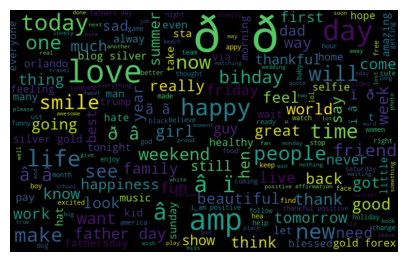

In [15]:
data.head()

all_words=" ".join([sentence for sentence in data['Clean_text']])

#plot the figure 
from wordcloud import WordCloud
wordcloud= WordCloud (width=800, height=500, random_state=42, max_font_size=100).generate(all_words)


plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

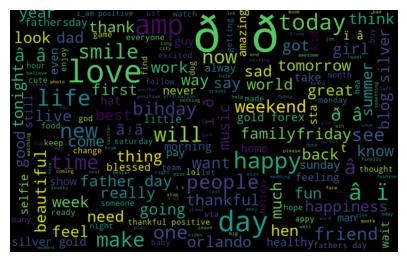

In [16]:
#+ve tweet

all_words=" ".join([sentence for sentence in data['Clean_text'][data['label']==0]])

from wordcloud import WordCloud
wordcloud= WordCloud (width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the figure
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

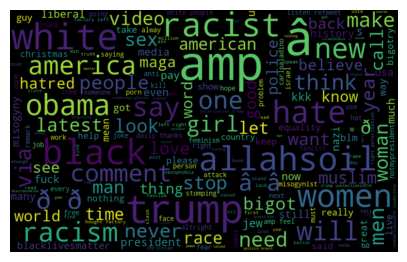

In [17]:
#-ve tweet
all_words=" ".join([sentence for sentence in data['Clean_text'][data['label']==1]])

from wordcloud import WordCloud
wordcloud= WordCloud (width=800, height=500, random_state=42, max_font_size=100).generate(all_words)


#plot the figure
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
# Applying Bag-of-words technique to the clean tweet texts
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow=bow_vectorizer.fit_transform (data['Clean_text'])

In [19]:
#Spliting the dataset into Trained set and Test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(bow, data['label'], random_state=42, test_size=0.25)

# Model Training
# LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [21]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer(use_idf=True, norm='12', smooth_idf=True)

#training
model = LogisticRegression().fit(x_train, y_train, sample_weight=2.5)

pred_logreg = model.predict(x_test) 
print ("model score: {:.2f}".format(model.score(x_test, y_test)))


model score: 0.94


In [22]:
#testing
pred= model.predict(x_test)
print("F1_Score for LogisticRegression : ", f1_score(y_test, pred))
print("Accuracy for LogisticRegression : ", accuracy_score(y_test,pred))


F1_Score for LogisticRegression :  0.4503311258278146
Accuracy for LogisticRegression :  0.943789787349316


In [23]:
!pip install imblearn

In [24]:

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(data['Clean_text']).reshape(-1, 1), np.array(data['label']).reshape(-1, 1))

train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['Clean_text', 'label'])

X = train_os['Clean_text'].values
y = train_os['label'].values

X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

X_test1 = data['Clean_text'].values
y_test1 = data['label'].values

y_train_le = y_train1.copy()
y_valid_le = y_valid1.copy()
y_test_le = y_test1.copy()

Baseline model: Naive Bayes Classifier

First we need to tokenize the tweets using CountVectorizer

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

clf = CountVectorizer()
X_train_cv =  clf.fit_transform(X_train1)
X_test_cv = clf.transform(X_test1)


Then we create the TF-IDF (term-frequency times inverse document-frequency) versions of the tokenized tweets.

In [26]:
tf_transformer = TfidfTransformer(use_idf=True, smooth_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_test_tf = tf_transformer.transform(X_test_cv)

Now we can define the Naive Bayes Classifier model

In [27]:
#confusion matrix
from sklearn.metrics import confusion_matrix

def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(3,3))
    labels=['Positive','Negative']
    ax=sns.heatmap(confusion_matrix(y, y_pred), cmap=plt.cm.Blues, annot=True, fmt='g', cbar=False, annot_kws={"size":15})
    
    plt.title(title, fontsize=10)
    ax.xaxis.set_ticklabels(labels, fontsize=10) 
    ax.yaxis.set_ticklabels(labels, fontsize=10)
    ax.set_ylabel('Test', fontsize=14)
    ax.set_xlabel('Predicted', fontsize=14)
    plt.show()

In [28]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tf, y_train_le, sample_weight=1)
nb_pred = nb_clf.predict(X_test_tf)

print("F1_Score for Naive Bayes Classification : ", f1_score(y_test1, nb_pred))
print("Accuracy for Naive Bayes Classification : ", accuracy_score(y_test1,nb_pred))


F1_Score for Naive Bayes Classification :  0.6766101694915254
Accuracy for Naive Bayes Classification :  0.9353877412800542


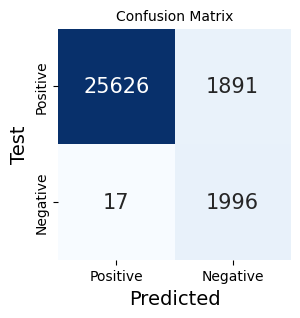

In [29]:
conf_matrix(y_test_le,nb_pred,'Confusion Matrix')

In [30]:
#metrics, f1_score and classification report on LogisticRegression
print('\tClassification Report for LogisticRegression:\n\n',  classification_report(y_test,pred, target_names=['1','0']))

	Classification Report for LogisticRegression:

               precision    recall  f1-score   support

           1       0.95      0.99      0.97      6870
           0       0.70      0.33      0.45       513

    accuracy                           0.94      7383
   macro avg       0.83      0.66      0.71      7383
weighted avg       0.93      0.94      0.93      7383



In [31]:
#metrics, f1_score and classification report on NB classification
print('\tClassification Report for Naive Bayes:\n\n',  classification_report(y_test_le,nb_pred, target_names=['1','0']))

	Classification Report for Naive Bayes:

               precision    recall  f1-score   support

           1       1.00      0.93      0.96     27517
           0       0.51      0.99      0.68      2013

    accuracy                           0.94     29530
   macro avg       0.76      0.96      0.82     29530
weighted avg       0.97      0.94      0.94     29530

